In [1]:
#Importing dependencies 
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import numpy as np

In [2]:
#reading in files
filepath = os.path.join(".", "Resources", "Crash_Data.csv")
df = pd.read_csv(filepath, low_memory=False)
pop_filepath = os.path.join(".", "Resources", "Population data.xlsx")
df_pop = pd.read_excel(pop_filepath, sheet_name = "Data1")

## Analysing Data

In [73]:
df

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day,Quarter
0,20212133,Vic,9,2021,Sunday,0:30,Single,,,,...,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night,Q3
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,Major Cities of Australia,Adelaide - North,Playford (C),,No,No,26_to_39,Weekend,Night,Q3
2,20212096,Vic,9,2021,Saturday,23:00,Single,,,,...,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night,Q3
3,20212145,Vic,9,2021,Saturday,22:25,Single,,,,...,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night,Q3
4,20212075,Vic,9,2021,Saturday,5:15,Single,,,,...,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,,No,...,,,,,No,No,0_to_16,Weekday,Day,Q1
52839,19895088,WA,1,1989,Monday,6:00,Single,No,,No,...,,,,,Yes,No,17_to_25,Weekday,Day,Q1
52840,19895088,WA,1,1989,Monday,6:00,Single,No,,No,...,,,,,Yes,No,17_to_25,Weekday,Day,Q1
52841,19895088,WA,1,1989,Monday,6:00,Single,No,,No,...,,,,,Yes,No,17_to_25,Weekday,Day,Q1


In [4]:
df.shape


(52843, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non-null  object
 13  A

In [6]:
df["Crash ID"].nunique()

47567

In [7]:
duplicate = df[df.duplicated(["Crash ID"])]
len(duplicate)

5276

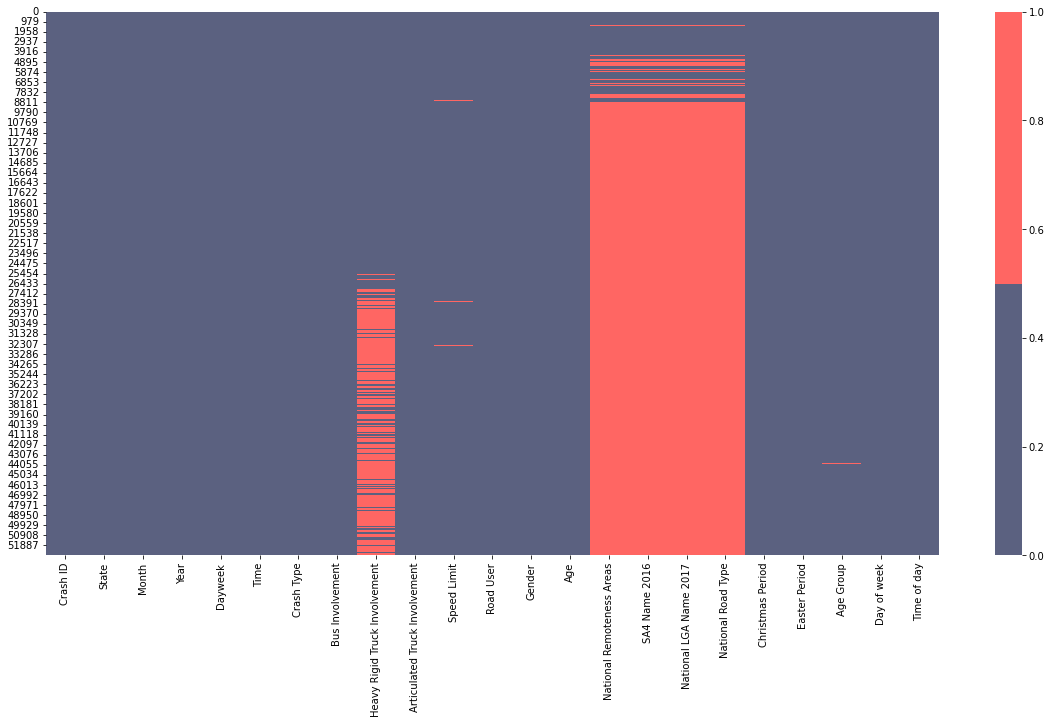

In [8]:
fig, ax = plt.subplots(figsize=(20,10))     
cols = df.columns 
colours = ['#5b6180', '#FF6663'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

In [9]:
#percentage of data missing per column

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f"{col} - {round(pct_missing*100)}")

Crash ID - 0
State - 0
Month - 0
Year - 0
Dayweek - 0
Time - 0
Crash Type - 0
Bus Involvement - 0
Heavy Rigid Truck Involvement - 39
Articulated Truck Involvement - 0
Speed Limit - 1
Road User - 0
Gender - 0
Age - 0
National Remoteness Areas - 87
SA4 Name 2016 - 87
National LGA Name 2017 - 87
National Road Type - 87
Christmas Period - 0
Easter Period - 0
Age Group - 0
Day of week - 0
Time of day - 0


## Cleaning Data

Cleaning the data from the population dataset. 



In [70]:
df.tail()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day,Quarter
52838,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,,No,...,,,,,No,No,0_to_16,Weekday,Day,Q1
52839,19895088,WA,1,1989,Monday,6:00,Single,No,,No,...,,,,,Yes,No,17_to_25,Weekday,Day,Q1
52840,19895088,WA,1,1989,Monday,6:00,Single,No,,No,...,,,,,Yes,No,17_to_25,Weekday,Day,Q1
52841,19895088,WA,1,1989,Monday,6:00,Single,No,,No,...,,,,,Yes,No,17_to_25,Weekday,Day,Q1
52842,19896063,Tas,1,1989,Tuesday,12:40,Multiple,No,,No,...,,,,,No,No,40_to_64,Weekday,Day,Q1


In [11]:
#removing superfluous rows 
df_pop = df_pop.iloc[9:, :]


In [12]:
df_pop.tail()

,Unnamed: 0,Estimated Resident Population ; Male ; New South Wales ;,Estimated Resident Population ; Male ; Victoria ;,Estimated Resident Population ; Male ; Queensland ;,Estimated Resident Population ; Male ; South Australia ;,Estimated Resident Population ; Male ; Western Australia ;,Estimated Resident Population ; Male ; Tasmania ;,Estimated Resident Population ; Male ; Northern Territory ;,Estimated Resident Population ; Male ; Australian Capital Territory ;,Estimated Resident Population ; Male ; Australia ;,...,Estimated Resident Population ; Female ; Australia ;,Estimated Resident Population ; Persons ; New South Wales ;,Estimated Resident Population ; Persons ; Victoria ;,Estimated Resident Population ; Persons ; Queensland ;,Estimated Resident Population ; Persons ; South Australia ;,Estimated Resident Population ; Persons ; Western Australia ;,Estimated Resident Population ; Persons ; Tasmania ;,Estimated Resident Population ; Persons ; Northern Territory ;,Estimated Resident Population ; Persons ; Australian Capital Territory ;,Estimated Resident Population ; Persons ; Australia ;
165,2020-06-01 00:00:00,4051716,3313938,2556616,873503,1328244,267230,126288,212892,12732938,...,12960329,8167024,6693858,5175245,1770277,2664212,540536,246235,431213,25693267
166,2020-09-01 00:00:00,4049429,3304692,2560204,873468,1329495,267355,126324,212696,12726185,...,12954964,8162613,6675626,5182750,1770249,2667361,540644,246457,430763,25681149
167,2020-12-01 00:00:00,4051606,3295641,2565637,873453,1330906,267514,126091,212619,12725993,...,12957695,8168294,6657917,5193404,1770467,2670646,540970,246280,431020,25683688
168,2021-03-01 00:00:00,4055333,3291551,2572425,874254,1333915,267782,126220,212956,12736964,...,12967953,8175379,6649441,5206878,1771952,2676777,541609,246580,431606,25704917
169,2021-06-01 00:00:00,4062850,3291572,2579244,874945,1336204,267611,126068,213183,12754212,...,12985044,8189266,6649159,5221170,1773243,2681633,541479,246338,432266,25739256


In [13]:
df_pop.columns

Index(['Unnamed: 0',
       'Estimated Resident Population ;  Male ;  New South Wales ;',
       'Estimated Resident Population ;  Male ;  Victoria ;',
       'Estimated Resident Population ;  Male ;  Queensland ;',
       'Estimated Resident Population ;  Male ;  South Australia ;',
       'Estimated Resident Population ;  Male ;  Western Australia ;',
       'Estimated Resident Population ;  Male ;  Tasmania ;',
       'Estimated Resident Population ;  Male ;  Northern Territory ;',
       'Estimated Resident Population ;  Male ;  Australian Capital Territory ;',
       'Estimated Resident Population ;  Male ;  Australia ;',
       'Estimated Resident Population ;  Female ;  New South Wales ;',
       'Estimated Resident Population ;  Female ;  Victoria ;',
       'Estimated Resident Population ;  Female ;  Queensland ;',
       'Estimated Resident Population ;  Female ;  South Australia ;',
       'Estimated Resident Population ;  Female ;  Western Australia ;',
       'Estimated Re

In [14]:
#Make column names more meaningful and easier to read

df_pop = df_pop.rename(columns = {'Unnamed: 0': 'Date',
                                 'Estimated Resident Population ;  Male ;  New South Wales ;':  "NSW - Male", 
                                'Estimated Resident Population ;  Male ;  Victoria ;': "Vic - Male",
                                'Estimated Resident Population ;  Male ;  Queensland ;': "QLD - Male",
                                'Estimated Resident Population ;  Male ;  South Australia ;': "SA - Male",
                                'Estimated Resident Population ;  Male ;  Western Australia ;': "WA - Male",
                                'Estimated Resident Population ;  Male ;  Tasmania ;': "Tas - Male",
                                'Estimated Resident Population ;  Male ;  Northern Territory ;': "NT - Male",
                                'Estimated Resident Population ;  Male ;  Australian Capital Territory ;': "ACT - Male",
                                'Estimated Resident Population ;  Male ;  Australia ;': "AUS - Male",
                                'Estimated Resident Population ;  Female ;  New South Wales ;':  "NSW - Female",
                                'Estimated Resident Population ;  Female ;  Victoria ;': "Vic - Female",
                                'Estimated Resident Population ;  Female ;  Queensland ;': "QLD - Female",
                                'Estimated Resident Population ;  Female ;  South Australia ;': "SA - Female",
                                'Estimated Resident Population ;  Female ;  Western Australia ;': "WA - Female",
                                'Estimated Resident Population ;  Female ;  Tasmania ;': "Tas - Female",
                                'Estimated Resident Population ;  Female ;  Northern Territory ;': "NT - Female",
                                'Estimated Resident Population ;  Female ;  Australian Capital Territory ;': "ACT - Female",
                                'Estimated Resident Population ;  Female ;  Australia ;': "AUS - Female",
                                'Estimated Resident Population ;  Persons ;  New South Wales ;': "NSW - All",
                                'Estimated Resident Population ;  Persons ;  Victoria ;': "Vic - All",
                                'Estimated Resident Population ;  Persons ;  Queensland ;': "QLD - All",
                                'Estimated Resident Population ;  Persons ;  South Australia ;': "SA - All",
                                'Estimated Resident Population ;  Persons ;  Western Australia ;': "WA - All",
                                'Estimated Resident Population ;  Persons ;  Tasmania ;': "Tas - All",
                                'Estimated Resident Population ;  Persons ;  Northern Territory ;': "NT - All",
                                'Estimated Resident Population ;  Persons ;  Australian Capital Territory ;': "ACT - All",
                                'Estimated Resident Population ;  Persons ;  Australia ;': "AUS - All",
                                 
                                 })
#Parse the month and year into new columns and drop old date column
df_pop["Month"] = df_pop["Date"].astype(str).str.split("-")
df_pop['Month'] = df_pop["Date"].astype(str).str[5:7]
df_pop["Year"] = df_pop["Date"].astype(str).str[:4]
df_pop = df_pop.drop("Date",axis = 1)



In [15]:
#Return Month and Year back to int 
df_pop["Month"] = df_pop["Month"].astype(int)
df_pop["Year"] = df_pop["Year"].astype(int)

In [16]:
#Reset the Index
df_pop.reset_index(drop = True, inplace = True)
df_pop

,NSW - Male,Vic - Male,QLD - Male,SA - Male,WA - Male,Tas - Male,NT - Male,ACT - Male,AUS - Male,NSW - Female,...,Vic - All,QLD - All,SA - All,WA - All,Tas - All,NT - All,ACT - All,AUS - All,Month,Year
0,2608351,1958717,1178447,653940,657249,212565,65393,113605,7448267,2626538,...,3946917,2345208,1318769,1300056,427224,122616,227581,14923260,6,1981
1,2616060,1964139,1189946,655136,663047,212862,66716,114215,7482121,2633395,...,3957333,2367477,1321235,1311284,427925,125186,228782,14988677,9,1981
2,2624579,1969349,1200504,657014,667381,212935,68023,114554,7514339,2642315,...,3968398,2387943,1325176,1320221,428283,127718,229484,15054117,12,1981
3,2634534,1975617,1210128,658840,672273,213477,69023,115374,7549266,2651585,...,3980826,2406355,1328670,1329700,429445,129593,230990,15121698,3,1982
4,2643527,1981619,1219369,660066,676892,213679,69388,116374,7580914,2660053,...,3992870,2424586,1331108,1338899,429845,130314,233045,15184247,6,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,4051716,3313938,2556616,873503,1328244,267230,126288,212892,12732938,4115308,...,6693858,5175245,1770277,2664212,540536,246235,431213,25693267,6,2020
157,4049429,3304692,2560204,873468,1329495,267355,126324,212696,12726185,4113184,...,6675626,5182750,1770249,2667361,540644,246457,430763,25681149,9,2020
158,4051606,3295641,2565637,873453,1330906,267514,126091,212619,12725993,4116688,...,6657917,5193404,1770467,2670646,540970,246280,431020,25683688,12,2020
159,4055333,3291551,2572425,874254,1333915,267782,126220,212956,12736964,4120046,...,6649441,5206878,1771952,2676777,541609,246580,431606,25704917,3,2021


In [17]:
#Create a column for quarter to later merge with crash data frame
df_pop.loc[(df_pop.Month >= 1) & (df_pop.Month <= 3), 'Quarter'] = "Q1"
df_pop.loc[(df_pop.Month >= 4) & (df_pop.Month <= 6), 'Quarter'] = "Q2"
df_pop.loc[(df_pop.Month >= 7) & (df_pop.Month <= 9), 'Quarter'] = "Q3"
df_pop.loc[(df_pop.Month >= 10) & (df_pop.Month <= 12), 'Quarter'] = "Q4"

In [18]:
df_pop

,NSW - Male,Vic - Male,QLD - Male,SA - Male,WA - Male,Tas - Male,NT - Male,ACT - Male,AUS - Male,NSW - Female,...,QLD - All,SA - All,WA - All,Tas - All,NT - All,ACT - All,AUS - All,Month,Year,Quarter
0,2608351,1958717,1178447,653940,657249,212565,65393,113605,7448267,2626538,...,2345208,1318769,1300056,427224,122616,227581,14923260,6,1981,Q2
1,2616060,1964139,1189946,655136,663047,212862,66716,114215,7482121,2633395,...,2367477,1321235,1311284,427925,125186,228782,14988677,9,1981,Q3
2,2624579,1969349,1200504,657014,667381,212935,68023,114554,7514339,2642315,...,2387943,1325176,1320221,428283,127718,229484,15054117,12,1981,Q4
3,2634534,1975617,1210128,658840,672273,213477,69023,115374,7549266,2651585,...,2406355,1328670,1329700,429445,129593,230990,15121698,3,1982,Q1
4,2643527,1981619,1219369,660066,676892,213679,69388,116374,7580914,2660053,...,2424586,1331108,1338899,429845,130314,233045,15184247,6,1982,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,4051716,3313938,2556616,873503,1328244,267230,126288,212892,12732938,4115308,...,5175245,1770277,2664212,540536,246235,431213,25693267,6,2020,Q2
157,4049429,3304692,2560204,873468,1329495,267355,126324,212696,12726185,4113184,...,5182750,1770249,2667361,540644,246457,430763,25681149,9,2020,Q3
158,4051606,3295641,2565637,873453,1330906,267514,126091,212619,12725993,4116688,...,5193404,1770467,2670646,540970,246280,431020,25683688,12,2020,Q4
159,4055333,3291551,2572425,874254,1333915,267782,126220,212956,12736964,4120046,...,5206878,1771952,2676777,541609,246580,431606,25704917,3,2021,Q1


In [62]:
#Create new dataframes for each state, add a new column with the state, 
#then reset the column names so they are the same for consolidating into a new dataframe 

nsw = df_pop[["Quarter", "Month", "Year", "NSW - Male", "NSW - Female", "NSW - All"]]
nsw.insert(0, 'State', 'NSW')
nsw.columns = [x.replace("NSW - ", "") for x in nsw.columns]

tas = df_pop[["Quarter", "Month", "Year", "Tas - Male", "Tas - Female", "Tas - All"]]
tas.insert(0, 'State', 'Tas')
tas.columns = [x.replace("Tas - ", "") for x in tas.columns]

vic = df_pop[["Quarter", "Month", "Year", "Vic - Male", "Vic - Female", "Vic - All"]]
vic.insert(0, 'State', 'Vic')
vic.columns = [x.replace("Vic - ", "") for x in vic.columns]

qld = df_pop[["Quarter", "Month", "Year", "QLD - Male", "QLD - Female", "QLD - All"]]
qld.insert(0, 'State', 'Qld')
qld.columns = [x.replace("QLD - ", "") for x in qld.columns]

sa = df_pop[["Quarter", "Month", "Year", "SA - Male", "SA - Female", "SA - All"]]
sa.insert(0, 'State', 'SA')
sa.columns = [x.replace("SA - ", "") for x in sa.columns]

wa = df_pop[["Quarter", "Month", "Year", "WA - Male", "WA - Female", "WA - All"]]
wa.insert(0, 'State', 'WA')
wa.columns = [x.replace("WA - ", "") for x in wa.columns]

nt = df_pop[["Quarter", "Month", "Year", "NT - Male", "NT - Female", "NT - All"]]
nt.insert(0, 'State', 'NT')
nt.columns = [x.replace("NT - ", "") for x in nt.columns]

act = df_pop[["Quarter", "Month", "Year", "ACT - Male", "ACT - Female", "ACT - All"]]
act.insert(0, 'State', 'ACT')
act.columns = [x.replace("ACT - ", "") for x in act.columns]

In [63]:
#replace NaN values with ''
df.fillna('', inplace=True)

#Create a column for quarter crash dataset to merge with population dataset

df.loc[(df.Month >= 1) & (df.Month <= 3), 'Quarter'] = "Q1"
df.loc[(df.Month >= 4) & (df.Month <= 6), 'Quarter'] = "Q2"
df.loc[(df.Month >= 7) & (df.Month <= 9), 'Quarter'] = "Q3"
df.loc[(df.Month >= 10) & (df.Month <= 12), 'Quarter'] = "Q4"
df

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day,Quarter
0,20212133,Vic,9,2021,Sunday,0:30,Single,,,,...,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night,Q3
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,Major Cities of Australia,Adelaide - North,Playford (C),,No,No,26_to_39,Weekend,Night,Q3
2,20212096,Vic,9,2021,Saturday,23:00,Single,,,,...,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night,Q3
3,20212145,Vic,9,2021,Saturday,22:25,Single,,,,...,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night,Q3
4,20212075,Vic,9,2021,Saturday,5:15,Single,,,,...,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,,No,...,,,,,No,No,0_to_16,Weekday,Day,Q1
52839,19895088,WA,1,1989,Monday,6:00,Single,No,,No,...,,,,,Yes,No,17_to_25,Weekday,Day,Q1
52840,19895088,WA,1,1989,Monday,6:00,Single,No,,No,...,,,,,Yes,No,17_to_25,Weekday,Day,Q1
52841,19895088,WA,1,1989,Monday,6:00,Single,No,,No,...,,,,,Yes,No,17_to_25,Weekday,Day,Q1


In [64]:
#Consolidating state dfs into one population df
state_pop = tas.append([vic, nsw, nt, act, wa, qld, sa])


In [65]:
state_pop
state_pop["State"].value_counts()

Tas    161
Vic    161
NSW    161
NT     161
ACT    161
WA     161
Qld    161
SA     161
Name: State, dtype: int64

In [66]:
df

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day,Quarter
0,20212133,Vic,9,2021,Sunday,0:30,Single,,,,...,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night,Q3
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,Major Cities of Australia,Adelaide - North,Playford (C),,No,No,26_to_39,Weekend,Night,Q3
2,20212096,Vic,9,2021,Saturday,23:00,Single,,,,...,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night,Q3
3,20212145,Vic,9,2021,Saturday,22:25,Single,,,,...,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night,Q3
4,20212075,Vic,9,2021,Saturday,5:15,Single,,,,...,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,,No,...,,,,,No,No,0_to_16,Weekday,Day,Q1
52839,19895088,WA,1,1989,Monday,6:00,Single,No,,No,...,,,,,Yes,No,17_to_25,Weekday,Day,Q1
52840,19895088,WA,1,1989,Monday,6:00,Single,No,,No,...,,,,,Yes,No,17_to_25,Weekday,Day,Q1
52841,19895088,WA,1,1989,Monday,6:00,Single,No,,No,...,,,,,Yes,No,17_to_25,Weekday,Day,Q1


In [74]:
#merging crash dataframe with population dataframe and renaming month column to a meaningful name

main_df = pd.merge(df, state_pop,  how='inner', on=['State', 'Year', 'Quarter'])
main_df = main_df.rename(columns={"Month_x": "Crash Month",
                                  "Month_y": "Population Month"
                                 })

main_df

for col in main_df.columns:
    pct_missing = np.mean(main_df[col].isnull())
    print(f"{col} - {round(pct_missing*100)}")

Crash ID - 0
State - 0
Crash Month - 0
Year - 0
Dayweek - 0
Time - 0
Crash Type - 0
Bus Involvement - 0
Heavy Rigid Truck Involvement - 0
Articulated Truck Involvement - 0
Speed Limit - 0
Road User - 0
Gender - 0
Age - 0
National Remoteness Areas - 0
SA4 Name 2016 - 0
National LGA Name 2017 - 0
National Road Type - 0
Christmas Period - 0
Easter Period - 0
Age Group - 0
Day of week - 0
Time of day - 0
Quarter - 0
Population Month - 0
Male - 0
Female - 0
All - 0


In [75]:
main_df

,Crash ID,State,Crash Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Christmas Period,Easter Period,Age Group,Day of week,Time of day,Quarter,Population Month,Male,Female,All
0,20212045,Vic,6,2021,Monday,5:40,Single,No,No,No,...,No,No,26_to_39,Weekend,Night,Q2,6,3291572,3357587,6649159
1,20212082,Vic,6,2021,Sunday,14:00,Single,No,No,No,...,No,No,40_to_64,Weekend,Day,Q2,6,3291572,3357587,6649159
2,20212079,Vic,6,2021,Saturday,13:25,Single,No,No,No,...,No,No,65_to_74,Weekend,Day,Q2,6,3291572,3357587,6649159
3,20212111,Vic,6,2021,Thursday,16:50,Single,No,No,No,...,No,No,40_to_64,Weekday,Day,Q2,6,3291572,3357587,6649159
4,20212149,Vic,6,2021,Wednesday,14:38,Multiple,No,No,No,...,No,No,17_to_25,Weekday,Day,Q2,6,3291572,3357587,6649159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52561,19897020,NT,3,1989,Saturday,2:16,Single,No,,No,...,No,No,17_to_25,Weekend,Night,Q1,3,84763,76287,161050
52562,19897054,NT,2,1989,Saturday,18:00,Single,No,,No,...,No,No,17_to_25,Weekend,Night,Q1,3,84763,76287,161050
52563,19897054,NT,2,1989,Saturday,18:00,Single,No,,No,...,No,No,17_to_25,Weekend,Night,Q1,3,84763,76287,161050
52564,19897038,NT,1,1989,Saturday,23:30,Single,No,,Yes,...,No,No,26_to_39,Weekend,Night,Q1,3,84763,76287,161050


In [77]:
main_df.tail(20)

,Crash ID,State,Crash Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Christmas Period,Easter Period,Age Group,Day of week,Time of day,Quarter,Population Month,Male,Female,All
52546,19894176,SA,1,1989,Sunday,12:00,Multiple,No,,No,...,No,No,17_to_25,Weekend,Day,Q1,3,703474,713464,1416938
52547,19894079,SA,1,1989,Sunday,15:00,Single,No,,No,...,No,No,26_to_39,Weekend,Day,Q1,3,703474,713464,1416938
52548,19894060,SA,1,1989,Sunday,15:15,Multiple,No,,No,...,No,No,40_to_64,Weekend,Day,Q1,3,703474,713464,1416938
52549,19894198,SA,1,1989,Monday,11:20,Single,No,,No,...,No,No,0_to_16,Weekday,Day,Q1,3,703474,713464,1416938
52550,19894128,SA,1,1989,Wednesday,16:10,Single,No,,No,...,No,No,0_to_16,Weekday,Day,Q1,3,703474,713464,1416938
52551,19894012,SA,1,1989,Wednesday,10:30,Multiple,No,,Yes,...,No,No,17_to_25,Weekday,Day,Q1,3,703474,713464,1416938
52552,19894036,SA,1,1989,Thursday,8:25,Multiple,No,,No,...,No,No,65_to_74,Weekday,Day,Q1,3,703474,713464,1416938
52553,19894170,SA,1,1989,Friday,10:35,Single,No,,No,...,No,No,75_or_older,Weekday,Day,Q1,3,703474,713464,1416938
52554,19894033,SA,1,1989,Friday,15:35,Single,No,,No,...,No,No,0_to_16,Weekday,Day,Q1,3,703474,713464,1416938
52555,19894028,SA,1,1989,Thursday,10:00,Single,No,,No,...,No,No,40_to_64,Weekday,Day,Q1,3,703474,713464,1416938


In [ ]:
main_df.loc[(main_df["State"] == "Tas" ) & (main_df["Year"] == 1993)].tail(50)

In [ ]:
main_df

In [ ]:
# creating CSV for team members
main_df.to_csv('./Resources/clean_crash_population.csv', index=False)

## Summary Stats

In [ ]:
age_mean = 
volume_median = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
volume_variance = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
volume_stddev = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
volume_sem = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()